In [47]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings('ignore')
import re
SEED = 42

# 데이터-속성 매칭
### HappyNewYear님의 공유 코드 사용
* https://dacon.io/competitions/official/235863/codeshare/3877?page=1&dtype=recent

In [48]:
d_code = pd.read_csv('./_data/속성_D_코드.csv', index_col=0).T.to_dict()
h_code = pd.read_csv('./_data/속성_H_코드.csv', index_col=0).T.to_dict()
l_code = pd.read_csv('./_data/속성_L_코드.csv', index_col=0).T.to_dict()

t1 = pd.read_csv('./_data/train.csv',index_col=0)
t2 = pd.read_csv('./_data/test.csv',index_col=0)

In [49]:
from typing import Dict
def add_code(
    df: pd.DataFrame,
    d_code: Dict[int, Dict[str, int]], 
    h_code: Dict[int, Dict[str, int]], 
    l_code: Dict[int, Dict[str, int]],
) -> pd.DataFrame:
    
    # Copy input data
    df = df.copy()   

    # D Code
    df['person_prefer_d_1_n'] = df['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
    df['person_prefer_d_1_s'] = df['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
    df['person_prefer_d_1_m'] = df['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
    df['person_prefer_d_1_l'] = df['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 대분류코드'])

    df['person_prefer_d_2_n'] = df['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
    df['person_prefer_d_2_s'] = df['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
    df['person_prefer_d_2_m'] = df['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
    df['person_prefer_d_2_l'] = df['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 대분류코드'])

    df['person_prefer_d_3_n'] = df['person_prefer_d_3'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
    df['person_prefer_d_3_s'] = df['person_prefer_d_3'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
    df['person_prefer_d_3_m'] = df['person_prefer_d_3'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
    df['person_prefer_d_3_l'] = df['person_prefer_d_3'].apply(lambda x: d_code[x]['속성 D 대분류코드'])

    df['contents_attribute_d_n'] = df['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
    df['contents_attribute_d_s'] = df['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
    df['contents_attribute_d_m'] = df['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
    df['contents_attribute_d_l'] = df['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 대분류코드'])

    # H Code
    df['person_prefer_h_1_l'] = df['person_prefer_h_1'].apply(lambda x: h_code[x]['속성 H 대분류코드'])
    df['person_prefer_h_1_m'] = df['person_prefer_h_1'].apply(lambda x: h_code[x]['속성 H 중분류코드'])
    
    df['person_prefer_h_2_l'] = df['person_prefer_h_2'].apply(lambda x: h_code[x]['속성 H 대분류코드'])
    df['person_prefer_h_2_m'] = df['person_prefer_h_2'].apply(lambda x: h_code[x]['속성 H 중분류코드'])
    
    df['person_prefer_h_3_l'] = df['person_prefer_h_3'].apply(lambda x: h_code[x]['속성 H 대분류코드'])
    df['person_prefer_h_3_m'] = df['person_prefer_h_3'].apply(lambda x: h_code[x]['속성 H 중분류코드'])

    df['contents_attribute_h_l'] = df['contents_attribute_h'].apply(lambda x: h_code[x]['속성 H 대분류코드'])
    df['contents_attribute_h_m'] = df['contents_attribute_h'].apply(lambda x: h_code[x]['속성 H 중분류코드'])

    # L Code
    df['contents_attribute_l_n'] = df['contents_attribute_l'].apply(lambda x: l_code[x]['속성 L 세분류코드'])
    df['contents_attribute_l_s'] = df['contents_attribute_l'].apply(lambda x: l_code[x]['속성 L 소분류코드'])
    df['contents_attribute_l_m'] = df['contents_attribute_l'].apply(lambda x: l_code[x]['속성 L 중분류코드'])
    df['contents_attribute_l_l'] = df['contents_attribute_l'].apply(lambda x: l_code[x]['속성 L 대분류코드'])
    
    return df

In [50]:
df_train = add_code(t1, d_code, h_code, l_code)
df_test = add_code(t2, d_code, h_code, l_code)

In [51]:
from sklearn.cluster import KMeans

def k_means_features(df,cols:list, k=5):
    X = df[cols]
    SEED = 42
    km = KMeans(n_clusters=k,
               init='k-means++',
               n_init=10,
               max_iter=300,
               tol=1e-04,
               random_state=SEED)
    y_km = km.fit_predict(X)
    return km, y_km

In [52]:
cluster_cols = ['person_attribute_a','person_attribute_a_1', 'person_attribute_b']
cluster_d_cols = ['person_prefer_d_1','person_prefer_d_2', 'person_prefer_d_3']
cluster_h_cols = ['person_prefer_h_1','person_prefer_h_2', 'person_prefer_h_3']

In [28]:
km, y_km = k_means_features(df_train, cluster_cols)
df_train['person_attribute_km'] = y_km
df_test['person_attribute_km'] = km.predict(df_test[cluster_cols])

km_d, y_kmd = k_means_features(df_train, cluster_d_cols)
df_train['person_attribute_kmd'] = y_kmd
df_test['person_attribute_kmd'] = km_d.predict(df_test[cluster_d_cols])

km_h, y_kmh = k_means_features(df_train, cluster_h_cols)
df_train['person_attribute_kmh'] = y_kmh
df_test['person_attribute_kmh'] = km_h.predict(df_test[cluster_h_cols])

1. 순서가 있는 특성 더미 만든거 제외해보기
2. 더미제거+contents attribute 클러스터링
'contents_attribute_a', 'contents_attribute_j_1',
       'contents_attribute_j', 'contents_attribute_c', 'contents_attribute_k',
       'contents_attribute_l', 'contents_attribute_m'

In [ ]:
['d_l_match_yn', 'd_m_match_yn', 'd_s_match_yn', 'h_l_match_yn',
       'h_m_match_yn', 'h_s_match_yn', 'person_prefer_c', 'person_prefer_d_1',
       'person_prefer_d_2', 'person_prefer_d_3', 'person_prefer_h_1',
       'person_prefer_h_2', 'person_prefer_h_3', 'contents_attribute_i',
       'contents_attribute_a', 'contents_attribute_j_1',
       'contents_attribute_j', 'contents_attribute_c', 'contents_attribute_k',
       'contents_attribute_l', 'contents_attribute_d', 'contents_attribute_m',
       'contents_attribute_e', 'contents_attribute_h', 'target',
       'contents_attribute_l_n', 'contents_attribute_l_s',
       'contents_attribute_l_m', 'contents_attribute_l_l',
       'person_attribute_km', 'person_attribute_kmd', 'person_attribute_kmh',
       'match_c', 'person_prefer_c5', 'match_e', 'differ_e',
       'person_attribute_a_1_0', 'person_attribute_a_1_1',
       'person_attribute_a_1_2', 'person_attribute_a_1_3',
       'person_attribute_a_1_4', 'person_attribute_a_1_5',
       'person_attribute_a_1_6', 'person_attribute_a_1_7',
       'person_attribute_b_0', 'person_attribute_b_1', 'person_attribute_b_2',
       'person_attribute_b_3', 'person_attribute_b_4', 'person_attribute_b_5',
       'person_prefer_e_0', 'person_prefer_e_1', 'person_prefer_e_2',
       'person_prefer_e_3', 'person_prefer_e_4', 'person_prefer_e_5',
       'person_prefer_e_6', 'person_prefer_e_7', 'person_prefer_e_8',
       'person_prefer_e_9', 'person_prefer_e_10', 'person_prefer_e_11',
       'contents_open_hour', 'contents_open_day']

# 실루엣 방법으로 군집 품질 정량화

In [ ]:
from matplotlib import cm
from sklearn.metrics import silhouette_samples

cluster_labels = df_train['y_km_k5'].unique()
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X,
                                    y_km,
                                    metric='euclidean')
y_ax_lower, y_ax_upper = 0,0
yticks=[]
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y==c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i)/n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),
            c_silhouette_vals,
            height=1.0,
            edgecolor='none',
            color=color)
    yticks.append((y_ax_lower + y_ax_upper)/2.)
    y_ax_lower+=len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg,
           color='red',
           linestyle='--')
plt.yticks(yticks, cluster_labels+1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette cofficient')
plt.tight_layout()
plt.show()

* 오래 걸림;ㅅ;

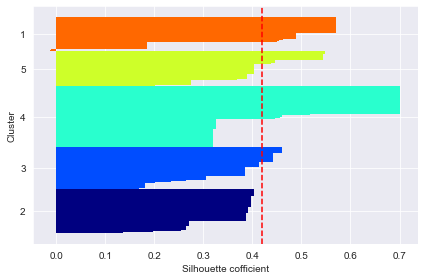

In [21]:
cols = ['person_attribute_a','person_attribute_a_1', 'person_attribute_b']
k5_km = k_means_features(df_train,5,k_means_X_cols)

X = df_train[cols]
km = KMeans(n_clusters=k,
            init='k-means++',
            n_init=10,
            max_iter=300,
            tol=1e-04,
            random_state=SEED)
y_km = km.fit_predict(X)

cluster_labels = df_train['y_km_k5'].unique()
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X,
                                    y_km,
                                    metric='euclidean')
y_ax_lower, y_ax_upper = 0,0
yticks=[]
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y==c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i)/n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),
            c_silhouette_vals,
            height=1.0,
            edgecolor='none',
            color=color)
    yticks.append((y_ax_lower + y_ax_upper)/2.)
    y_ax_lower+=len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg,
           color='red',
           linestyle='--')
plt.yticks(yticks, cluster_labels+1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette cofficient')
plt.tight_layout()
plt.show()

# 엘보우 방법으로 최적 클러스터 개수 찾기

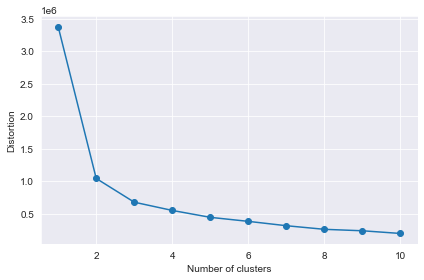

In [25]:
distortions = []
X=df_train[cluster_cols]
for i in range(1,11):
    km = KMeans(n_clusters=i,
               init='k-means++',
               n_init=10,
               max_iter=300,
               random_state=42)
    km.fit(X)
    distortions.append(km.inertia_)
plt.plot(range(1,11),distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

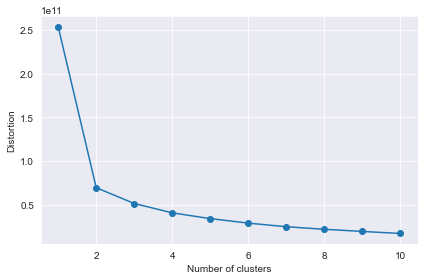

In [33]:
distortions = []
cluster_d_cols = ['person_prefer_d_1','person_prefer_d_2', 'person_prefer_d_3']
for i in range(1,11):
    km = KMeans(n_clusters=i,
               init='k-means++',
               n_init=10,
               max_iter=300,
               random_state=42)
    km.fit(df_train[cluster_d_cols])
    distortions.append(km.inertia_)
plt.plot(range(1,11),distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

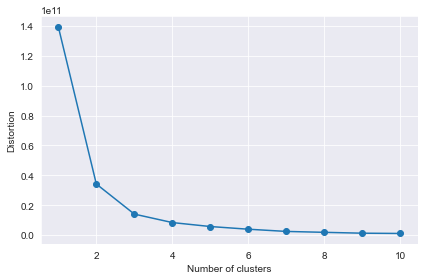

In [38]:
distortions = []
cluster_contents_cols = ['contents_attribute_a', 'contents_attribute_j_1',
       'contents_attribute_j', 'contents_attribute_c', 'contents_attribute_k',
       'contents_attribute_l', 'contents_attribute_m']
for i in range(1,11):
    km = KMeans(n_clusters=i,
               init='k-means++',
               n_init=10,
               max_iter=300,
               random_state=42)
    km.fit(df_train[cluster_contents_cols])
    distortions.append(km.inertia_)
plt.plot(range(1,11),distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

h, d 세부코드에 대한 클러스터링

In [53]:
person_d_cols = ['person_prefer_d_1_n',
 'person_prefer_d_1_s',
 'person_prefer_d_1_m',
 'person_prefer_d_1_l',
 'person_prefer_d_2_n',
 'person_prefer_d_2_s',
 'person_prefer_d_2_m',
 'person_prefer_d_2_l',
 'person_prefer_d_3_n',
 'person_prefer_d_3_s',
 'person_prefer_d_3_m',
 'person_prefer_d_3_l']

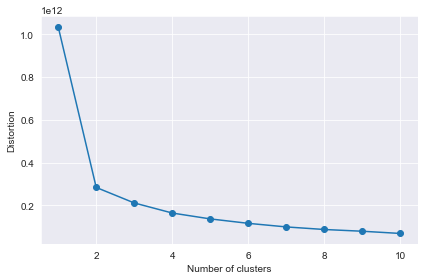

In [54]:
distortions = []
X=df_train[person_d_cols]
for i in range(1,11):
    km = KMeans(n_clusters=i,
               init='k-means++',
               n_init=10,
               max_iter=300,
               random_state=42)
    km.fit(X)
    distortions.append(km.inertia_)
plt.plot(range(1,11),distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

In [55]:
person_h_cols = ['person_prefer_h_1_l',
 'person_prefer_h_1_m',
 'person_prefer_h_2_l',
 'person_prefer_h_2_m',
 'person_prefer_h_3_l',
 'person_prefer_h_3_m']

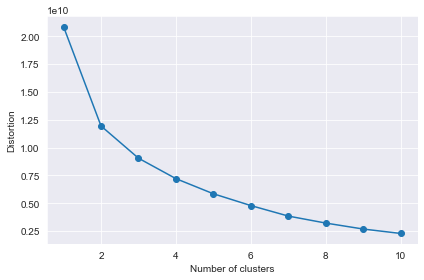

In [56]:
distortions = []
X=df_train[person_h_cols]
for i in range(1,11):
    km = KMeans(n_clusters=i,
               init='k-means++',
               n_init=10,
               max_iter=300,
               random_state=42)
    km.fit(X)
    distortions.append(km.inertia_)
plt.plot(range(1,11),distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

In [7]:
df_train

,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,...,person_prefer_h_2_m,person_prefer_h_3_l,person_prefer_h_3_m,contents_attribute_h_l,contents_attribute_h_m,contents_attribute_l_n,contents_attribute_l_s,contents_attribute_l_m,contents_attribute_l_l,y_km(k3)
id,,,,,,,,,,,,,,,,,,,,,
0,True,True,True,False,False,False,1,4,3,5,...,398,58,368,94,422,1607,1606,1605,2016,2
1,False,False,False,True,True,False,1,3,4,1,...,400,94,399,94,417,1607,1606,1605,2016,2
2,False,False,False,True,False,False,2,0,3,5,...,528,48,366,48,363,1599,1595,1572,2016,0
3,False,False,False,True,False,False,2,0,2,5,...,495,1,315,71,381,1607,1606,1605,2016,0
4,True,True,True,False,False,False,1,3,4,5,...,481,208,480,71,381,1607,1606,1605,2016,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501946,False,False,False,True,False,False,1,1,2,2,...,316,94,398,58,373,352,347,346,2006,0
501947,True,True,False,True,False,False,1,6,2,1,...,425,94,398,94,425,155,138,99,2006,1
501948,True,True,True,True,False,False,1,7,4,1,...,413,94,422,58,373,437,417,407,2006,1


In [8]:
df_test

,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,...,person_prefer_h_2_m,person_prefer_h_3_l,person_prefer_h_3_m,contents_attribute_h_l,contents_attribute_h_m,contents_attribute_l_n,contents_attribute_l_s,contents_attribute_l_m,contents_attribute_l_l,y_km(k3)
id,,,,,,,,,,,,,,,,,,,,,
0,True,False,False,True,True,True,1,1,2,1,...,366,48,359,250,528,1146,1128,1021,2010,1
1,False,False,False,True,False,False,2,0,2,2,...,528,48,359,250,528,1610,1606,1605,2016,1
2,True,False,False,True,True,True,2,3,2,1,...,451,169,452,169,453,1812,1811,1810,2020,2
3,True,False,False,True,True,True,1,2,2,5,...,451,169,452,169,453,101,100,99,2006,2
4,True,False,False,True,False,False,1,6,4,5,...,453,3,316,169,453,984,980,954,2009,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46399,True,True,True,False,False,False,2,0,4,1,...,316,94,398,85,396,759,759,759,2006,1
46400,True,False,False,True,False,False,2,0,4,1,...,342,277,542,85,396,759,759,759,2006,1
46401,True,True,False,True,True,True,2,0,3,1,...,543,277,542,277,547,759,759,759,2006,1


# 동일한 속성 매칭 및 순서형 데이터 처리
### 열람일시 데이터로 시간, 요일 정보 추가
### 같은 알파벳은 동일한 속성을 의미. 속성 매칭 여부 정보 추가

In [9]:
from sklearn.preprocessing import LabelEncoder

def match_cols(df, del_columns=False):
    
    del_cols = ['person_attribute_a','person_prefer_f','person_prefer_g', 'contents_open_dt', 'person_rn', 'contents_rn']
    
    
    # d속성과 h속성 일치여부
    p_cols = []
    c_d_cols = []
    c_h_cols = []    
    for i in df.columns:
        if re.findall('person_prefer_._._',i):
            p_cols.append(i)
        if re.findall('contents_attribute_d_.',i):
            c_d_cols.append(i)    
        if re.findall('contents_attribute_h+',i):
            c_h_cols.append(i)
            
    for i in p_cols:
        if i.split('_')[2] == 'd':
            for cols in c_d_cols:
                if i.split('_')[-1] == cols[-1]:
                    df[i[-5:]+'_match_yn'] = (df[i]==df[cols]).astype(int)
        else:
            for cols in c_h_cols:
                if i.split('_')[-1] == cols[-1]:
                    df[i[-5:]+'_match_yn'] = (df[i]==df[cols]).astype(int)
    

    # 선호속성c와 컨텐츠 속성c 일치여부
    df['match_c'] = (df.person_prefer_c==df.contents_attribute_c).astype(int)  
    # 회원선호속성 c는 1~5까지 있는 반면, 컨텐츠 속성c는 1~4만 있음
    # 5 = 무응답이나 기타일것같은.. 없으면 성능 떨어짐
    df['person_prefer_c5'] = (df.person_prefer_c==5).astype(int) 
    
    # 선호속성e와 컨텐츠 속성e 일치여부
    df['match_e'] = (df.person_prefer_e==df.contents_attribute_e).astype(int)
    # person_prefer_e 와 contents_attribute_e차이
    df['differ_e'] = df['person_prefer_e'] - df['contents_attribute_e']
        
    # 순서가 있는 속성
    df = pd.get_dummies(df, columns=['person_attribute_a_1','person_attribute_b','person_prefer_e'])

    #contents_open_dt
    df['contents_open_dt'] = pd.to_datetime(df['contents_open_dt'])
    df['contents_open_hour'] = df['contents_open_dt'].dt.hour
    df['contents_open_day'] = df['contents_open_dt'].dt.dayofweek
    
    if del_columns:
        del_cols += (p_cols + c_d_cols + c_h_cols)
                     
    new_df = df.drop(del_cols, axis=1)

    return new_df

In [10]:
train = match_cols(df_train)
test = match_cols(df_test)

In [11]:
train.columns

Index(['d_l_match_yn', 'd_m_match_yn', 'd_s_match_yn', 'h_l_match_yn',
       'h_m_match_yn', 'h_s_match_yn', 'person_prefer_d_1',
       'person_prefer_d_2', 'person_prefer_d_3', 'person_prefer_h_1',
       ...
       'person_prefer_e_4', 'person_prefer_e_5', 'person_prefer_e_6',
       'person_prefer_e_7', 'person_prefer_e_8', 'person_prefer_e_9',
       'person_prefer_e_10', 'person_prefer_e_11', 'contents_open_hour',
       'contents_open_day'],
      dtype='object', length=106)

In [12]:
test.columns

Index(['d_l_match_yn', 'd_m_match_yn', 'd_s_match_yn', 'h_l_match_yn',
       'h_m_match_yn', 'h_s_match_yn', 'person_prefer_d_1',
       'person_prefer_d_2', 'person_prefer_d_3', 'person_prefer_h_1',
       ...
       'person_prefer_e_4', 'person_prefer_e_5', 'person_prefer_e_6',
       'person_prefer_e_7', 'person_prefer_e_8', 'person_prefer_e_9',
       'person_prefer_e_10', 'person_prefer_e_11', 'contents_open_hour',
       'contents_open_day'],
      dtype='object', length=105)

# CatBoostClassifier 사용

In [13]:
from catboost import Pool,CatBoostClassifier
import sklearn 
from sklearn.model_selection import StratifiedKFold , KFold
from sklearn.metrics import f1_score 


In [14]:
y_train = train['target']
X_train = train.drop(['target'],axis=1)
X_test = test

In [15]:
cat_features = X_train.columns[X_train.nunique() > 2].tolist()
cat_features

['person_prefer_d_1',
 'person_prefer_d_2',
 'person_prefer_d_3',
 'person_prefer_h_1',
 'person_prefer_h_2',
 'person_prefer_h_3',
 'contents_attribute_i',
 'contents_attribute_j_1',
 'contents_attribute_l',
 'contents_attribute_d',
 'contents_attribute_m',
 'contents_attribute_e',
 'contents_attribute_h',
 'person_prefer_d_1_n',
 'person_prefer_d_1_s',
 'person_prefer_d_1_m',
 'person_prefer_d_1_l',
 'person_prefer_d_2_n',
 'person_prefer_d_2_s',
 'person_prefer_d_2_m',
 'person_prefer_d_2_l',
 'person_prefer_d_3_n',
 'person_prefer_d_3_s',
 'person_prefer_d_3_m',
 'person_prefer_d_3_l',
 'contents_attribute_d_n',
 'contents_attribute_d_s',
 'contents_attribute_d_m',
 'contents_attribute_d_l',
 'person_prefer_h_1_l',
 'person_prefer_h_1_m',
 'person_prefer_h_2_l',
 'person_prefer_h_2_m',
 'person_prefer_h_3_l',
 'person_prefer_h_3_m',
 'contents_attribute_h_l',
 'contents_attribute_h_m',
 'contents_attribute_l_n',
 'contents_attribute_l_s',
 'contents_attribute_l_m',
 'contents_attri

In [19]:
cat_features = cat_features[:-11]+ ['y_km(k3)']+ cat_features[-8:] #contents_attribute_l_l, differ_e제외
cat_features

['person_prefer_d_1',
 'person_prefer_d_2',
 'person_prefer_d_3',
 'person_prefer_h_1',
 'person_prefer_h_2',
 'person_prefer_h_3',
 'contents_attribute_i',
 'contents_attribute_j_1',
 'contents_attribute_l',
 'contents_attribute_d',
 'contents_attribute_m',
 'contents_attribute_e',
 'contents_attribute_h',
 'person_prefer_d_1_n',
 'person_prefer_d_1_s',
 'person_prefer_d_1_m',
 'person_prefer_d_1_l',
 'person_prefer_d_2_n',
 'person_prefer_d_2_s',
 'person_prefer_d_2_m',
 'person_prefer_d_2_l',
 'person_prefer_d_3_n',
 'person_prefer_d_3_s',
 'person_prefer_d_3_m',
 'person_prefer_d_3_l',
 'contents_attribute_d_n',
 'contents_attribute_d_s',
 'contents_attribute_d_m',
 'contents_attribute_d_l',
 'person_prefer_h_1_l',
 'person_prefer_h_1_m',
 'person_prefer_h_2_l',
 'person_prefer_h_2_m',
 'person_prefer_h_3_l',
 'person_prefer_h_3_m',
 'contents_attribute_h_l',
 'contents_attribute_h_m',
 'contents_attribute_l_n',
 'contents_attribute_l_s',
 'contents_attribute_l_m',
 'y_km(k3)',
 'p

In [20]:
len(cat_features)

49

In [21]:
SEED = 42
is_holdout = False
n_splits = 5
iterations = 3000
patience = 100

cv = KFold(n_splits=n_splits, shuffle=True, random_state=SEED)

In [ ]:
scores = []
models = []
for tri, vai in cv.split(X_train):
    print("="*50)
    preds = []

    model = CatBoostClassifier(iterations=iterations,random_state=SEED,task_type="CPU",eval_metric="F1",cat_features=cat_features)#,one_hot_max_size=4
    model.fit(X_train.iloc[tri], y_train[tri], 
            eval_set=[(X_train.iloc[vai], y_train[vai])], 
            early_stopping_rounds=patience ,
            verbose = 100
        )
    
    models.append(model)
    scores.append(model.get_best_score()["validation"]["F1"])
    if is_holdout:
        break 

Learning rate set to 0.086395
0:	learn: 0.6101889	test: 0.6129936	best: 0.6129936 (0)	total: 1.42s	remaining: 1h 11m 1s
100:	learn: 0.6578773	test: 0.6859361	best: 0.6859361 (100)	total: 2m 43s	remaining: 1h 17m 59s
200:	learn: 0.6648071	test: 0.6919121	best: 0.6920614 (199)	total: 5m 23s	remaining: 1h 15m 3s
300:	learn: 0.6684304	test: 0.6928135	best: 0.6928135 (300)	total: 8m 19s	remaining: 1h 14m 37s
400:	learn: 0.6709268	test: 0.6930588	best: 0.6937039 (379)	total: 11m 25s	remaining: 1h 14m 4s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.6937038661
bestIteration = 379

Shrink model to first 380 iterations.
Learning rate set to 0.086395
0:	learn: 0.6312537	test: 0.6362484	best: 0.6362484 (0)	total: 1.76s	remaining: 1h 27m 50s
100:	learn: 0.6598444	test: 0.6825157	best: 0.6825157 (100)	total: 3m 1s	remaining: 1h 26m 47s
200:	learn: 0.6652101	test: 0.6897348	best: 0.6900832 (181)	total: 5m 57s	remaining: 1h 23m 3s
300:	learn: 0.6691565	test: 0.6925795	best: 0.6

In [ ]:
print(scores)
print(np.mean(scores))

* k5, 4가지 l 모두 제외했을 때 0.69155
* k5, 4가지 l 대분류만 제외했을 때 0.6917399210868103
* k3,

In [ ]:
threshold = 0.4
pred_list = []
scores = []
for i,(tri, vai) in enumerate( cv.split(X_train) ):
    pred = models[i].predict_proba(X_train.iloc[vai])[:, 1]
    pred = np.where(pred >= threshold , 1, 0)
    score = f1_score(y_train[vai],pred)
    scores.append(score)
    pred = models[i].predict_proba(X_test)[:, 1]
    pred_list.append(pred)
print(scores)
print(np.mean(scores))

In [ ]:
pred = np.mean( pred_list , axis = 0 )
pred = np.where(pred >= threshold , 1, 0)

In [ ]:
submission = pd.read_csv('./_data/sample_submission.csv')
submission.head()

In [26]:
submission['target'] = pred
submission

,id,target
0,0,0
1,1,0
2,2,0
3,3,0
4,4,1
...,...,...
46399,46399,1
46400,46400,1
46401,46401,1
46402,46402,1


In [27]:
submission.to_csv('./submission15.csv', index=False)

# public 0.70096